# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [3]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Developer C++",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [5]:
data['items'][0]

{'id': '71147159',
 'premium': False,
 'name': 'Программист С++ Senior',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 400000, 'to': 700000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T21:02:36+0300',
 'created_at': '2023-03-01T21:02:36+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=71147159',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/71147159?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/71147159',
 'relations': [],
 'employer': {'id': '9261916',
  'name': 'Дубайт',
  'url': 'https://api.hh.ru/employers/9261916',
  'alternate_url': 'https://hh.ru/employer/9261916',
  'logo_urls': {'90': 'https://hhcdn.ru/employer-

Сколько всего найдено вакансий

In [6]:
data['found']

1509

Количество страниц в результатах поиска

In [7]:
data['pages']

16

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [8]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,...,address.metro.lng,address.metro_stations,address.id,employer.logo_urls,address.metro,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,71147159,False,Программист С++ Senior,NaN,False,False,NaN,None,None,2023-03-01T21:02:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77332497,False,Lead C++ developer,NaN,False,False,NaN,None,None,2023-03-03T15:12:03+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,77373213,False,Младший Бэкэнд разработчик (Junior Backend Dev...,NaN,False,False,NaN,None,None,2023-03-02T18:24:51+0300,...,37.620917,"[{'station_name': 'Нагатинская', 'line_name': ...",402887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77609520,False,Middle+/Senior C++ Developer (unified highload...,NaN,False,False,NaN,None,None,2023-03-02T16:02:02+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75776019,False,Junior С++ developer/Программист,NaN,False,False,NaN,None,None,2023-03-02T13:47:39+0300,...,37.557293,"[{'station_name': 'Воробьевы горы', 'line_name...",12136958,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [9]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [10]:
vacancy_info

{'id': '71147159',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Программист С++ Senior',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 400000, 'to': 700000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p><strong>ООО «Дубайт»</strong> — это FinTech компания, специализирующаяся на разработке программного обеспечения для финансовых организаций, применяющих в своей деятельности алгоритмические и высокочастотные стратегии (HFT) на биржевых и внебиржевых рынках.</p> <p>В наш проект по развитию и доработ

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [ ]:
def GetParams1(page):
  params_c = {
    'text': "Data Scientist",
    'area': 1,
    'page': page,
    'per_page': 100
  }
  return params_c

df_all = pd.DataFrame()
for i in range(3):
  req = requests.get(URL, GetParams1(i))
  data = json.loads(req.content.decode())
  df_c = pd.json_normalize(data['items'])
  df_all = pd.concat([df_all, df_c], ignore_index=True)
  sleep(0.2)

def GetParams2(page):
  params_d = {
    'text': "аналитик данных",
    'area': 1,
    'page': page,
    'per_page': 100
  }
  return params_d

for i in range(20):
  req = requests.get(URL, GetParams2(i))
  data = json.loads(req.content.decode())
  df_d = pd.json_normalize(data['items'])
  df_all = pd.concat([df_all, df_d], ignore_index=True)
  sleep(0.2)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [ ]:
df_all.drop_duplicates('id',keep=False, inplace=True)
df_all.reset_index(drop=True, inplace=True)

In [ ]:
df_all = df_all[['id', 'name', 'salary.from', 'salary.gross', 'address.raw', 'employer.name', 'snippet.requirement', 'snippet.responsibility']]
df_all

,id,name,salary.from,salary.gross,address.raw,employer.name,snippet.requirement,snippet.responsibility
0,74376536,Data scientist,200000.0,False,"Москва, Походный проезд, 14",Астор,Опыт работы на позиции <highlighttext>data</hi...,Работа в команде по созданию модуля <highlight...
1,74257661,Data scientist,150000.0,False,"Москва, Минская улица, 2Гк1",НАО Финансовые системы,"анализа, лин. алгебры, статистики. Отличные зн...",Разработка скоринг системы. Поиск и обработка ...
2,77604691,Junior Data Scientist (отдел исследований и мо...,NaN,NaN,"Москва, Правды, 8 к.1",Банк Хоум Кредит,Навыки программирования на языке Python. Знани...,"Сбор, обработка, изучение и статистический ана..."
3,77656158,Data Scientist Intern,40000.0,True,Екатеринбург,hotellab.io,Желание развиваться и изучать новейшие методы ...,Применение алгоритмов машинного обучения для р...
4,77075807,Data Scientist,NaN,NaN,NaN,"Лента, федеральная розничная сеть",Имеешь опыт работы такими инструментами как Ap...,"Анализ эластичности спроса по цене, построение..."
...,...,...,...,...,...,...,...,...
2201,76709351,Главный специалист (финансовая аналитика),NaN,NaN,NaN,Московский Кредитный Банк,Продвинутые навыки работы в Excel и с кубами <...,Ведение управленческой отчетности. Расчет КПЭ....
2202,69985032,Веб-аналитик,NaN,NaN,None,Спортмастер,...базами <highlighttext>данных</highlighttext...,Участие в разработке единой системы идентифика...
2203,76668597,Ведущий аналитик в отдел кабинетных исследований,NaN,NaN,NaN,Конкурентные Закупки,"Excel, уверенный пользователь ОБЯЗАТЕЛЬНО! уме...",Расчет объема и ёмкости рынков (в том числе пр...
2204,76845430,Руководитель направления анализа данных,NaN,NaN,NaN,Российская академия народного хозяйства и госу...,...анализа <highlighttext>данных</highlighttex...,...обработкой <highlighttext>данных</highlight...


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [ ]:
vacancy_df = pd.DataFrame()
for i in range(df_all.shape[0]):
  vacancy = df_all['id'].iloc[i]
  vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  df_copy = pd.json_normalize(vacancy_info)
  vacancy_df = pd.concat([vacancy_df, df_copy], ignore_index=True)
  sleep(0.2)

In [ ]:
vacancy_df = vacancy_df[['id', 'name', 'description', 'key_skills', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'address.lat',
                         'address.lng', 'address.raw', 'experience.name', 'schedule.name', 'employment.name', 'employer.name']]
vacancy_df                      

,id,name,description,key_skills,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,address.raw,experience.name,schedule.name,employment.name,employer.name
0,74376536,Data scientist,<strong>Обязанности:</strong> <ul> <li>Работа ...,"[{'name': 'Python'}, {'name': 'PyTorch'}, {'na...",200000.0,240000.0,RUR,False,55.838091,37.417167,"Москва, Походный проезд, 14",От 3 до 6 лет,Удаленная работа,Полная занятость,Астор
1,74257661,Data scientist,<p><strong>ОБЯЗАТЕЛЬНО: опыт разработки работа...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",150000.0,300000.0,RUR,False,55.718035,37.502857,"Москва, Минская улица, 2Гк1",От 3 до 6 лет,Полный день,Полная занятость,НАО Финансовые системы
2,77604691,Junior Data Scientist (отдел исследований и мо...,<p>В нашу команду исследований и моделирования...,[],NaN,NaN,NaN,NaN,55.784152,37.579205,"Москва, Правды, 8 к.1",Нет опыта,Полный день,Полная занятость,Банк Хоум Кредит
3,77656158,Data Scientist Intern,<p>Международная ĸомпания Hotellab.io является...,"[{'name': 'Revenue Management'}, {'name': 'Inf...",40000.0,50000.0,RUR,True,56.838011,60.597465,Екатеринбург,От 1 года до 3 лет,Полный день,Стажировка,hotellab.io
4,77075807,Data Scientist,"<p>Мы – департамент Ленты, который отвечает за...","[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Полная занятость,"Лента, федеральная розничная сеть"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,76709351,Главный специалист (финансовая аналитика),<strong>Обязанности:</strong> <ul> <li>Ведение...,"[{'name': 'Английский язык'}, {'name': 'Работа...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,От 1 года до 3 лет,Полный день,Полная занятость,Московский Кредитный Банк
2202,69985032,Веб-аналитик,<p><strong>Привет!<br /><br />Наша омни-команд...,"[{'name': 'Google Analytics'}, {'name': 'SQL'}...",NaN,NaN,NaN,NaN,None,None,None,От 1 года до 3 лет,Удаленная работа,Полная занятость,Спортмастер
2203,76668597,Ведущий аналитик в отдел кабинетных исследований,<p>Лидирующему маркетинговому агентству <stron...,"[{'name': 'Анализ рынка'}, {'name': 'Аналитиче...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,От 1 года до 3 лет,Удаленная работа,Полная занятость,Конкурентные Закупки
2204,76845430,Руководитель направления анализа данных,<p>Совместно с проектным офисом Минстроя Росси...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,От 3 до 6 лет,Полный день,Полная занятость,Российская академия народного хозяйства и госу...


In [ ]:
vacancy_df.to_excel('data_scientist.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
vacancy_df.shape[0]

2206

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [ ]:
top_skill = {}

for i in range(vacancy_df.shape[0]):
  for j in vacancy_df.iloc[i][3]:
    for k in j.values():
      if k in top_skill.keys():
        top_skill[k] += 1
      else:
        top_skill[k] = 1;
top_skill = sorted(top_skill.items(), key=lambda it: it[1], reverse=True)
top_skill_df = pd.DataFrame(top_skill, columns=["Навыки", "Количество вакансий в которых навык необходим"])
top_skill_df = top_skill_df[0 : 15]

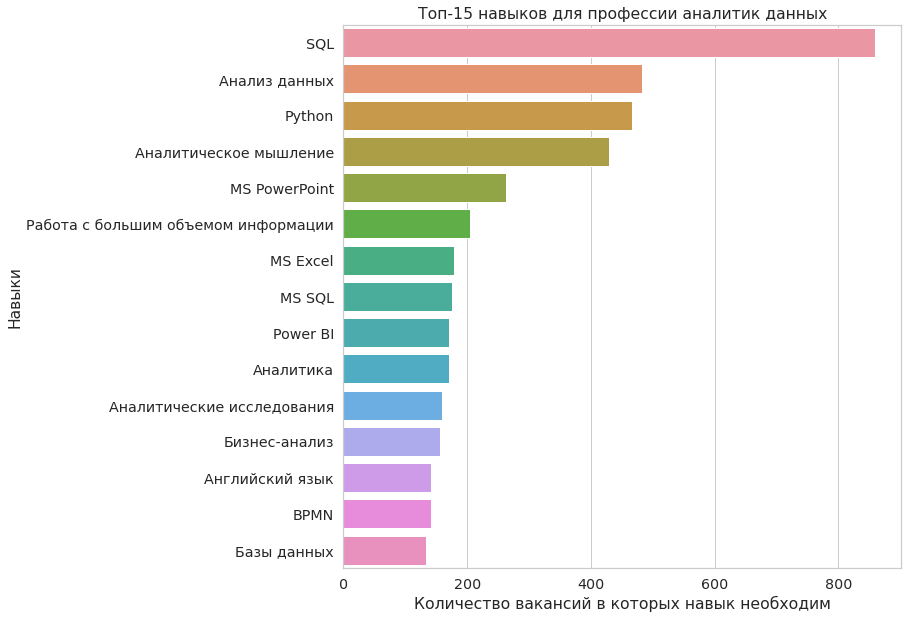

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=top_skill_df, y="Навыки", x="Количество вакансий в которых навык необходим")
plt.title("Топ-15 навыков для профессии аналитик данных")
None

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

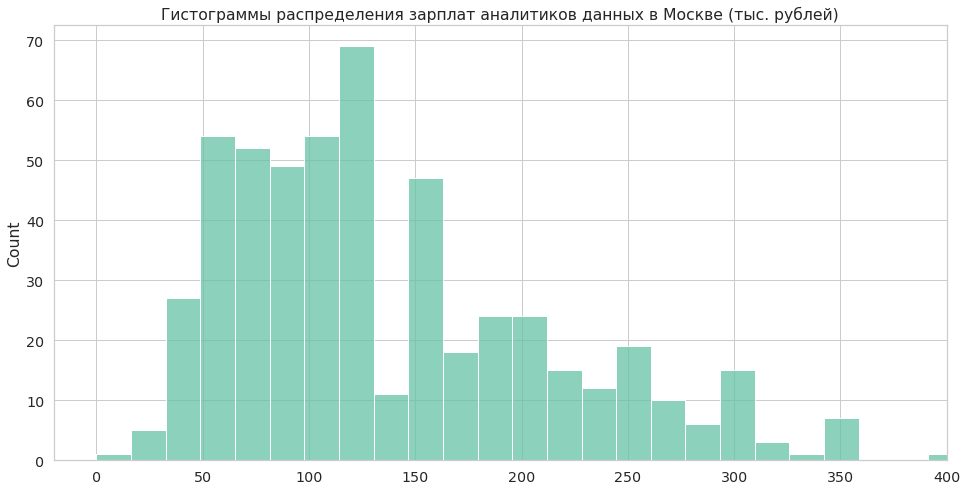

In [ ]:
def func(row):
  tmp = max((row['salary.to'] or 0), (row['salary.from'] or 0))
  if row['salary.currency'] == 'USD':
    tmp *= 75
  if row['salary.currency'] == 'EUR':
    tmp *= 80
  if row['salary.gross']:
    return tmp * 0.87
  else:
    return tmp

df_gross = vacancy_df.apply(lambda row: func(row), axis=1)
df_gross.dropna(inplace=True)
df_gross = df_gross // 1000
plt.figure(figsize=(16,8))
sns.histplot(data=df_gross, bins=40)
plt.title("Гистограммы распределения зарплат аналитиков данных в Москве (тыс. рублей)")
plt.xlim((-20, 400))
None

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [12]:
def GetParams3(page):
  params_c = {
    'text': "Разработчик С++",
    'area': 1,
    'page': page,
    'per_page': 100
  }
  return params_c

df_all2 = pd.DataFrame()
for i in range(13):
  req = requests.get(URL, GetParams3(i))
  data = json.loads(req.content.decode())
  df_c2 = pd.json_normalize(data['items'])
  df_all2 = pd.concat([df_all2, df_c2], ignore_index=True)
  sleep(0.2)

def GetParams4(page):
  params_d = {
    'text': "Developer C++",
    'area': 1,
    'page': page,
    'per_page': 100
  }
  return params_d

for i in range(16):
  req = requests.get(URL, GetParams4(i))
  data = json.loads(req.content.decode())
  df_d2 = pd.json_normalize(data['items'])
  df_all2 = pd.concat([df_all2, df_d2], ignore_index=True)
  sleep(0.2)

In [13]:
df_all2.drop_duplicates('id', inplace=True)
df_all2.reset_index(drop=True, inplace=True)
df_all2 = df_all2[['id', 'name', 'salary.from', 'salary.gross', 'address.raw', 'employer.name', 'snippet.requirement', 'snippet.responsibility']]
df_all2

,id,name,salary.from,salary.gross,address.raw,employer.name,snippet.requirement,snippet.responsibility
0,71147159,Программист С++ Senior,400000.0,False,NaN,Дубайт,Опыт работы с Linux на уровне продвинутого пол...,"Разработка приложений, работающих с биржевой и..."
1,71147174,Разработчик С++ Middle,180000.0,False,"Москва, проспект Вернадского, 29",Дубайт,Опыт работы с Linux на уровне продвинутого пол...,"Разработка приложений, работающих с биржевой и..."
2,77410246,Программист С++,200000.0,True,NaN,Комтех-Н,Практическое знание <highlighttext>C++</highli...,None
3,77605524,Программист С++,150000.0,True,"Москва, Волгоградский проспект, 42",Радиокомп,Профильное высшее образование. Опыт работы в с...,Разработка и тестирование продукта на <highlig...
4,75776019,Junior С++ developer/Программист,120000.0,False,"Москва, Лужнецкая набережная, 2/4с4",UPwms,Знаниe <highlighttext>C++</highlighttext>. Зна...,Разработка новых и модификация существующих пр...
...,...,...,...,...,...,...,...,...
1504,76773026,С++ специалист (tcp/ip),NaN,NaN,NaN,Волчанская Анастасия Александровна,опыт <highlighttext>разработки</highlighttext>...,тесное взаимодействие с внутренними API ядра о...
1505,76558551,Специалист АСУ 6 категория,137000.0,False,"Павловский Посад, Мишутинское шоссе, 66б",Павлово-Посадский Гофрокомбинат,...используемых в устройствах. Промышленной ав...,Проведение мероприятий по техническому обслужи...
1506,76938338,Аналитик,NaN,NaN,"Москва, Ленинградский проспект, 37Ак4",НПО АПРОТЕХ,Опыт <highlighttext>разработки</highlighttext>...,...решений с другими участниками проекта. Совм...
1507,76720986,Системный администратор Linux / DevOps инженер,120000.0,False,"Москва, Баррикадная улица, 8с5А",Гео Техно Сот,"Опыт работы с системами мониторинга (Zabbix, P...",...и <highlighttext>разработками</highlighttex...


Теперь считаем подробное описание для каждой вакансии

In [ ]:
vacancy_df2 = pd.DataFrame()
for i in range(df_all2.shape[0]):
  vacancy = df_all2['id'].iloc[i]
  vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  df_copy = pd.json_normalize(vacancy_info)
  vacancy_df2 = pd.concat([vacancy_df2, df_copy], ignore_index=True)
  sleep(0.2)
vacancy_df2

In [20]:
vacancy_df2 = vacancy_df2[['id', 'name', 'description', 'key_skills', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'address.lat',
                         'address.lng', 'address.raw', 'experience.name', 'schedule.name', 'employment.name', 'employer.name']]
vacancy_df2

,id,name,description,key_skills,salary.from,salary.to,salary.currency,salary.gross,address.lat,address.lng,address.raw,experience.name,schedule.name,employment.name,employer.name
0,71147159,Программист С++ Senior,<p><strong>ООО «Дубайт»</strong> — это FinTech...,"[{'name': 'Linux'}, {'name': 'C++'}, {'name': ...",400000,700000,RUR,False,NaN,NaN,NaN,От 3 до 6 лет,Полный день,Полная занятость,Дубайт
1,71147174,Разработчик С++ Middle,<p><strong>ООО «Дубайт»</strong> — это FinTech...,"[{'name': 'Linux'}, {'name': 'STL'}, {'name': ...",180000,400000,RUR,False,55.681712,37.516449,"Москва, проспект Вернадского, 29",От 1 года до 3 лет,Полный день,Полная занятость,Дубайт
2,77410246,Программист С++,<p>Требуются программисты C++ для разработки и...,"[{'name': 'C++'}, {'name': 'Linux'}, {'name': ...",200000,200000,RUR,True,NaN,NaN,NaN,От 3 до 6 лет,Полный день,Полная занятость,Комтех-Н
3,77605524,Программист С++,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"[{'name': 'C++'}, {'name': 'Английский язык'},...",150000,None,RUR,True,55.705858,37.725487,"Москва, Волгоградский проспект, 42",От 3 до 6 лет,Полный день,Полная занятость,Радиокомп
4,75776019,Junior С++ developer/Программист,<p><strong>Обязанности:</strong></p> <ul> <li>...,"[{'name': 'SQL'}, {'name': 'Git'}, {'name': 'J...",120000,150000,RUR,False,55.715489,37.573627,"Москва, Лужнецкая набережная, 2/4с4",От 1 года до 3 лет,Полный день,Полная занятость,UPwms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,76773026,С++ специалист (tcp/ip),<p>ЗАДАЧИ:</p> <p>- работа в распределенной ко...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Более 6 лет,Удаленная работа,Полная занятость,Волчанская Анастасия Александровна
1505,76558551,Специалист АСУ 6 категория,<p>Мы предлагаем:</p> <p>-Официальное оформлен...,"[{'name': 'Автоматизация производства'}, {'nam...",137000,None,RUR,False,55.766602,38.688301,"Павловский Посад, Мишутинское шоссе, 66б",От 1 года до 3 лет,Полный день,Полная занятость,Павлово-Посадский Гофрокомбинат
1506,76938338,Аналитик,<p><strong>Апротех</strong> — дочерняя IT-комп...,"[{'name': 'Системное мышление'}, {'name': 'Сис...",NaN,NaN,NaN,NaN,55.791714,37.54232,"Москва, Ленинградский проспект, 37Ак4",От 3 до 6 лет,Полный день,Полная занятость,НПО АПРОТЕХ
1507,76720986,Системный администратор Linux / DevOps инженер,<strong>Обязанности:</strong> <ul> <li>Админис...,"[{'name': 'Linux'}, {'name': 'TCP/IP'}, {'name...",120000,None,RUR,False,55.761983,37.582071,"Москва, Баррикадная улица, 8с5А",От 1 года до 3 лет,Полный день,Полная занятость,Гео Техно Сот


Посмотрим, сколько всего вакансий C++ есть в Москве:

In [21]:
vacancy_df2.shape[0]

1509

Теперь проверим какие навыки наиболее актуальны для этой профессии

In [23]:
top_skill2 = {}

for i in range(vacancy_df2.shape[0]):
  for j in vacancy_df2.iloc[i][3]:
    for k in j.values():
      if k in top_skill2.keys():
        top_skill2[k] += 1
      else:
        top_skill2[k] = 1;
top_skill2 = sorted(top_skill2.items(), key=lambda it: it[1], reverse=True)
top_skill_df2 = pd.DataFrame(top_skill2, columns=["Навыки", "Количество вакансий в которых навык необходим"])
top_skill_df2 = top_skill_df2[0 : 15]

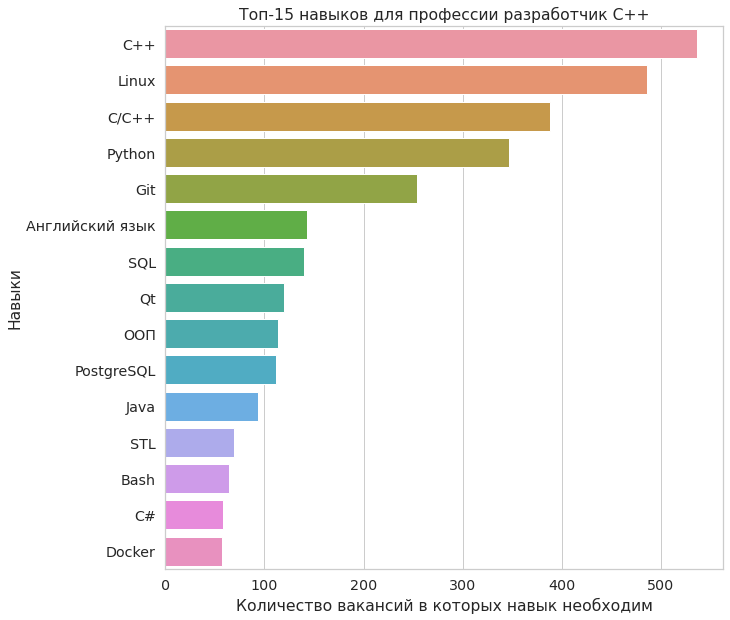

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(data=top_skill_df2, y="Навыки", x="Количество вакансий в которых навык необходим")
plt.title("Топ-15 навыков для профессии разработчик C++")
None

И наконец, найдем и построим гистограмму распределения зарплат

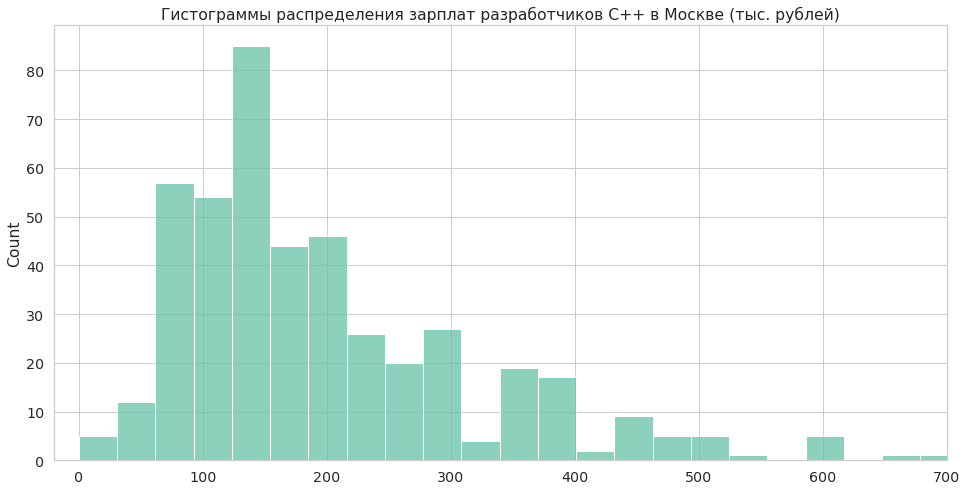

In [28]:
def func2(row):
  tmp = max((row['salary.to'] or 0), (row['salary.from'] or 0))
  if row['salary.currency'] == 'USD':
    tmp *= 75
  if row['salary.currency'] == 'EUR':
    tmp *= 80
  if row['salary.gross']:
    return tmp * 0.87
  else:
    return tmp

df_gross2 = vacancy_df2.apply(lambda row: func2(row), axis=1)
df_gross2.dropna(inplace=True)
df_gross2 = df_gross2 // 1000
plt.figure(figsize=(16,8))
sns.histplot(data=df_gross2, bins=40)
plt.title("Гистограммы распределения зарплат разработчиков С++ в Москве (тыс. рублей)")
plt.xlim((-20, 700))
None

**Вывод:**

Мы проанализировали рынок вакансий Data Scientist в Москве и нашли количество выставленных на hh.ru вакансий. Также определили какие навыки наиболее востребованы в этой вакансии, ими оказались SQL, Python и другие. Кроме того, мы построили гистограмму распределения зарплат на вакансиях аналитиков данных.

Все это мы сделали также и для профессии Разработчик C++, поэтому наш анализ очень пригодится людям, которые в данный момент выбирают между этими двумя профессиями, так как в нашем решении можно наглядно сравнить профессии по основным характеристикам, таким как зарплата и навыки.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Я буду проводить анализ вакансии Аналитика данных. Для начала посмотрим, какой опыт требуется для какого количенства вакансий.

In [ ]:
experience_df = vacancy_df.groupby(by='experience.name').count()
experience_df.reset_index(inplace=True)
experience_df = experience_df[['experience.name', 'id']]
experience_df = pd.concat([experience_df[1:], experience_df[0:1]])

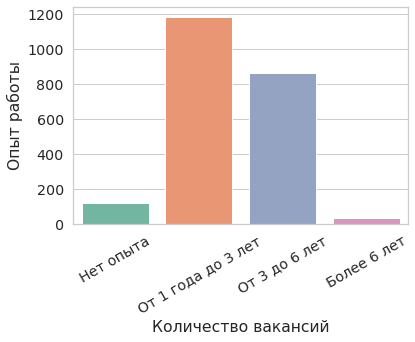

In [ ]:
plot = sns.barplot(data=experience_df, y='id', x='experience.name')
plt.xticks(rotation=30)
plot.set(xlabel='Количество вакансий', ylabel='Опыт работы')
None

Проанализируем, какие работадатели в топе вакансий Data scientist.
Сначала посмотрим, какие работадатели выкладывают больше всего вакансий:

In [ ]:
count_emp = vacancy_df.groupby(by='employer.name').count()
count_emp.reset_index(inplace=True)
count_emp = count_emp[['employer.name', 'id']]
count_emp.sort_values(by=['id'], inplace=True, ascending=False)
count_emp.head(10)

,employer.name,id
854,СБЕР,111
663,МТС,38
1050,Яндекс,34
396,Банк ВТБ (ПАО),34
282,VK,28
936,Тинькофф,25
1052,билайн,22
907,Спортмастер,20
790,Промсвязьбанк,19
568,"Иннотех, Группа компаний",17


Далее проверим, какие средние зарплаты у работадателей с количеством вакансий >= 10.

In [ ]:
count_emp_copy = count_emp[count_emp['id'] >= 10]

In [ ]:
avg_sal_emp = vacancy_df.groupby(by='employer.name').mean()
avg_sal_emp.reset_index(inplace=True)
avg_sal_emp = avg_sal_emp[['employer.name', 'salary.from']]
avg_sal_emp.sort_values(by=['salary.from'], inplace=True, ascending=False)
avg_sal_emp = avg_sal_emp.set_index('employer.name')
avg_sal_emp = avg_sal_emp.loc[count_emp_copy['employer.name']]
avg_sal_emp.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,salary.from
employer.name,
СБЕР,200000.0
МТС,100000.0
Яндекс,NaN
Банк ВТБ (ПАО),NaN
VK,NaN
Тинькофф,NaN
билайн,NaN
Спортмастер,NaN
Промсвязьбанк,NaN


Как видно, большинство работадателей предпочитают не писать заработную плату в вакансии.

Проверим теперь распределение вакансий по карте Москвы и найдем, в каком районе зафиксировано наибольшее количество вакансий.

Для начала просто изобразим вакансии на карте Москвы:


In [ ]:
import folium

vacancy_df_copy = vacancy_df.copy(deep=True)
vacancy_df_copy.dropna(subset=['address.lng', 'address.lat'], inplace=True)
map = folium.Map(location=[55.73,37.6], zoom_start = 11.4)


for i, j in zip(vacancy_df_copy['address.lng'], vacancy_df_copy['address.lat']):
  folium.CircleMarker(location=[j, i], radius=4, fill_color='green', color='green', fill_opacity=0.5, aplpha=0.5).add_to(map)

map

Теперь распределим вакансии по районам и отобразим на карте.

Топ 10 районов Москвы с наибольшим количеством вакансий выделим в красный цвет.

In [ ]:
top_10 = set([(37.54, 55.74), (37.60, 55.78), (37.58,	55.78), (37.62,	55.74), (37.64,	55.74), (37.66,	55.70), (37.60,	55.76), (37.62,	55.76), (37.56,	55.76), (37.64,	55.76)])
# Сверху множество из координат топ 10 районов Москвы с наибольшим количеством вакансий, которые я ищу чуть ниже
def color_change(i, j):
    if((i, j) in top_10):
      return 'red'
    else:
      return 'green'

In [ ]:
vacancy_df_copy2 = vacancy_df.copy()
vacancy_df_copy2 = vacancy_df_copy2.convert_dtypes()
vacancy_df_copy2.dropna(subset=['address.lng', 'address.lat'], inplace=True)

vacancy_df_copy2['address.lng'] = np.round(vacancy_df_copy2['address.lng']*50) / 50
vacancy_df_copy2['address.lat'] = np.round(vacancy_df_copy2['address.lat']*50) / 50

map = folium.Map(location=[55.73,37.6], zoom_start = 11.4)


for i, j in zip(vacancy_df_copy2['address.lng'], vacancy_df_copy2['address.lat']):
  folium.CircleMarker(location=[j, i], radius=4, fill_color=color_change(i, j), color=color_change(i, j), fill_opacity=0.5, aplpha=0.5).add_to(map)

map

Теперь найдем явно топ 10 районов Москвы с наибольшим количеством вакансий.

In [ ]:
table = vacancy_df_copy2.groupby(by=['address.lng', 'address.lat']).count()
table.reset_index(inplace=True)
table = table[['address.lng', 'address.lat', 'id']]
table.sort_values(by=['id'], ascending=False, inplace=True)
table.rename(columns={'id' : 'Всего вакансий в районе'})
table.head(10)

,address.lng,address.lat,id
73,37.54,55.74,96
107,37.60,55.78,38
115,37.62,55.74,37
127,37.64,55.74,37
135,37.66,55.70,34
95,37.58,55.78,34
116,37.62,55.76,31
106,37.60,55.76,30
128,37.64,55.76,28
76,37.54,55.80,26


Сопоставив координаты названию района получим топ 10 районов с наибольшим количеством вакансий.

Теперь определимв каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом

Наибольшим спросом данная вакансия пользуется в районе:

In [ ]:
table.head(1)

,address.lng,address.lat,id
73,37.54,55.74,96


Наименьшим спросом данная вакансия пользуется в нескольких (а именно в 68) районах:

In [ ]:
table[table['id'] == 1]

,address.lng,address.lat,id
182,38.00,55.92,1
187,60.60,56.84,1
180,37.98,55.68,1
184,40.98,57.00,1
183,38.02,55.90,1
...,...,...,...
46,37.48,55.68,1
44,37.48,55.64,1
43,37.48,55.58,1
41,37.44,55.90,1


Какие выводы можно сделать из построенных графиков?

**Вывод:**

Во второй части задания, мы проверили какой опыт нужен на вакансии Data Scientist в Москве. В результате анализа, мы выяснили, что наибольшее число вакансий размещено для людей с опытом работы от 1 до 3 лет. Это значит, что в целом на рынке не нехватки супер опытных специалистов и компании ищут в основном начинающих в этой профессии людей.

Также, основываясь на количестве размещенных вакансий и средней зарплате, мы составили топ самых популярных работадалей Москвы. Ими оказались Сбер, МТС, Яндекс и другие.

Кроме того, мы разместили вакансии на карте Москвы, затем разбили Москву на районы и подсчитали количество вакансий в каждом из них. Затем отметили на карте вакансии по района. В рузельтате этого, выяснилось, что наибольшее число вакансий сосредоточено в центральный районах Москвы. Это и логично, так как большинство офисов крупнейших компаний расположено в центре города.